##### DS4002 Project 3: Decision Tree Modeling

In [3]:
# load in packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 

from sklearn.model_selection import train_test_split,RepeatedKFold,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor, export_graphviz 
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [38]:
# read in dataset

temp = pd.read_csv(r"C:\Users\Owner\Downloads\average_temperature_ds.csv")
print(temp)

         date  days_min0_degrees  days_min32_degrees  days_max32_degrees  \
0    Jul 1945                  0                   0                   0   
1    Aug 1945                  0                   0                   0   
2    Sep 1945                  0                   0                   0   
3    Oct 1945                  0                   0                   0   
4    Nov 1945                  0                   6                   0   
..        ...                ...                 ...                 ...   
917  Apr 2023                  0                   0                   0   
918  May 2023                  0                   0                   0   
919  Jun 2023                  0                   0                   0   
920  Jul 2023                  0                   0                   0   
921  Sep 2023                  0                   0                   0   

     days_max70_degrees  days_max90_degrees  numD_fog  numD_thunder  \
0               

In [39]:
# drop NA values 

temp_1 = temp.dropna()
print(temp_1.dtypes)

date                   object
days_min0_degrees       int64
days_min32_degrees      int64
days_max32_degrees      int64
days_max70_degrees      int64
days_max90_degrees      int64
numD_fog                int64
numD_thunder            int64
min_temp_ext          float64
max_snow_depth          int64
max_daily_snowfall      int64
max_daily_rain        float64
max_temp_ext          float64
total_rain            float64
total_snowfall          int64
avrg_temp             float64
avg_max_temp          float64
avg_min_temp          float64
dtype: object


In [40]:
# drop non numeric columns

temp_1.drop(['date', 'avg_max_temp', 'avg_min_temp'], axis=1, inplace=True)

In [41]:
# split data into x and y variables

X = temp_1.drop(columns='avrg_temp')
y = temp_1.avrg_temp

In [42]:
# split into test, train, and tune datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=21)
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50,random_state=49)

In [43]:
# cross validation: the process in which the training data that will be used to to build the initial model is set

kf =RepeatedKFold(n_splits=10,n_repeats =5, random_state=42)

In [44]:
# hyper-parameter search 

param={
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    }


In [45]:
# scoring parameters: what metrics will the splits and parameters be judged by?

scoring= ['neg_mean_squared_error','r2','neg_mean_absolute_error'] 

In [46]:
# train the model

reg=DecisionTreeRegressor(random_state=30)

# set up search for best decisiontree regressor

search = GridSearchCV(reg, param, scoring=scoring, n_jobs=-1, cv=kf,refit='r2')

# search on training data

model = search.fit(X_train, y_train)

In [47]:
# best estimator out of all the parameters passed (based on lowest RMSE)

best= model.best_estimator_
print(best)

DecisionTreeRegressor(max_depth=6, random_state=30)


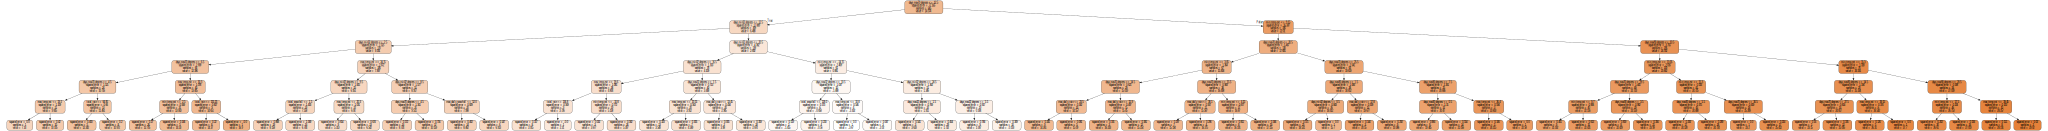

In [48]:
# plot for visualizing best estimator 

dot_data = export_graphviz(best, out_file =None,
               feature_names =X.columns, #feature names from dataset
               filled=True, 
                rounded=True, ) 
               
graph=graphviz.Source(dot_data)
graph

In [49]:
# specific scores

print(model.cv_results_)

{'mean_fit_time': array([0.00300545, 0.0041133 , 0.00528204, 0.00631022, 0.00733924,
       0.00732917, 0.00771483, 0.01018693, 0.0112308 , 0.0120226 ,
       0.01124119, 0.01102197, 0.01350308, 0.00960982, 0.01211054,
       0.01190367, 0.01111762, 0.0121958 , 0.0138424 , 0.01267779]), 'std_fit_time': array([0.00560748, 0.00703585, 0.00717216, 0.0077174 , 0.00773844,
       0.00829691, 0.00830471, 0.00847749, 0.0080768 , 0.00779085,
       0.00745719, 0.00830781, 0.00915447, 0.00855887, 0.00714385,
       0.00900872, 0.00762522, 0.00703626, 0.00648012, 0.00789484]), 'mean_score_time': array([0.00497906, 0.00431949, 0.00322489, 0.00297476, 0.00327882,
       0.00367293, 0.00338587, 0.00339642, 0.00341413, 0.00438755,
       0.00355621, 0.00499543, 0.0046182 , 0.00660052, 0.0040564 ,
       0.00484406, 0.00491213, 0.00444871, 0.00312634, 0.00496061]), 'std_score_time': array([0.00716718, 0.00674891, 0.00637341, 0.00576849, 0.00563919,
       0.00682085, 0.00607501, 0.00605324, 0.0060196

In [50]:
# scores 

mean_sq_err = np.sqrt(abs(model.cv_results_['mean_test_neg_mean_squared_error']))
r2= model.cv_results_['mean_test_r2']
mae= abs(model.cv_results_['mean_test_neg_mean_absolute_error'])

SDmse =  model.cv_results_['std_test_neg_mean_squared_error']
SDr2= model.cv_results_['std_test_r2']
SDmae= model.cv_results_['std_test_neg_mean_absolute_error']

depth= np.unique(model.cv_results_['param_max_depth']).data

final_model = pd.DataFrame(list(zip(depth, mean_sq_err, r2,mae, SDmse,SDr2,SDmae)),
               columns =['depth','rmse','r2','mae',"rmseSD",'r2SD','maeSD'])

print(final_model.head)

<bound method NDFrame.head of     depth      rmse        r2       mae    rmseSD      r2SD     maeSD
0       1  4.161033  0.770881  3.531769  2.169884  0.031973  0.262125
1       2  2.385084  0.924678  1.940185  0.718164  0.011473  0.142073
2       3  1.591654  0.966537  1.268975  0.451419  0.006155  0.118858
3       4  1.299755  0.977626  1.022616  0.228395  0.003550  0.072394
4       5  1.127147  0.983139  0.880463  0.209636  0.003264  0.073034
5       6  1.041956  0.985619  0.810210  0.221578  0.003189  0.087604
6       7  1.065023  0.984928  0.824246  0.212296  0.003297  0.085194
7       8  1.103348  0.983787  0.855871  0.221028  0.003617  0.084677
8       9  1.117859  0.983410  0.857815  0.218635  0.003398  0.082954
9      10  1.138314  0.982793  0.878702  0.247955  0.003849  0.088664
10     11  1.130419  0.983021  0.873419  0.242454  0.003802  0.091253
11     12  1.139436  0.982738  0.879574  0.242648  0.003836  0.089410
12     13  1.134504  0.982914  0.876873  0.247075  0.003764 

In [51]:
# most important variables  

varimp=pd.DataFrame(best.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False)
print(varimp)

                    importance
days_max70_degrees    0.798182
days_min32_degrees    0.099651
min_temp_ext          0.086789
days_max90_degrees    0.010403
max_temp_ext          0.003260
days_max32_degrees    0.000639
total_snowfall        0.000347
total_rain            0.000267
max_daily_rain        0.000257
max_daily_snowfall    0.000204
days_min0_degrees     0.000000
numD_fog              0.000000
numD_thunder          0.000000
max_snow_depth        0.000000


Axes(0.125,0.11;0.775x0.77)


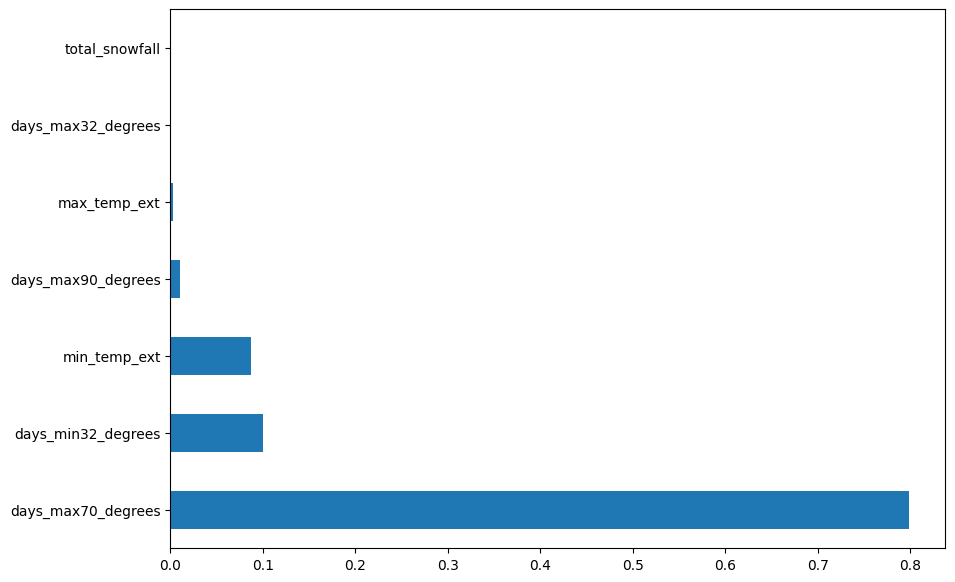

In [52]:
# plotting importance as a barplot

plt.figure(figsize=(10,7))
print(varimp.importance.nlargest(7).plot(kind='barh'))

In [53]:
# predictions

pred=best.predict(X_test)
print(pred[:10])

[27.019375   15.25416667  6.91333333 28.19125    24.12764706 25.41235294
  6.74357143 20.55       12.79538462  6.54230769]


In [54]:
# test data prediction accuracy (R^2)

print(best.score(X_test, y_test))  

0.9831278530975339


In [55]:
# tune data prediction accuracy (R^2)

print(best.score(X_tune, y_tune))

0.9801747782493817


In [58]:
# other prediction metrics

# R^2, close to 1
print(metrics.r2_score(y_test, pred))

# RMSE, less than 0.5
print(np.sqrt(metrics.mean_squared_error(y_test, pred))) 

# MAE, less than 0.5
print(metrics.mean_absolute_error(y_test, pred))

0.9831278530975339
1.0919794844174882
0.8457731714974692
